#  Logistic Regression Using Gradient Descent 

### Dataset

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

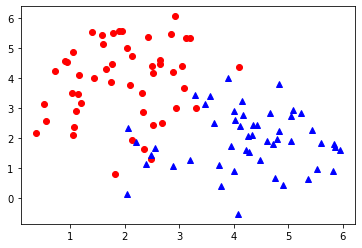

In [43]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


In [44]:
for i in range(len(X)):
    print(X[i][0], X[i][1],  y[i])

1.8909826286626954 5.556186439264636 0
4.34848886375046 2.4491181494744203 1
5.850043878572935 1.8241935432677303 1
4.120722207938899 2.4140250968447057 1
4.676639672330662 2.8311057781317683 1
2.8838931126173457 4.195865022037645 0
2.3841007874217617 1.1480353973738167 1
1.145224512657073 3.4868548940485797 0
2.4380244970191476 5.357789015047975 0
1.0377840156219489 3.5175490887172063 0
3.1201322592365397 5.332778208133576 0
4.27207688822695 2.075074010077445 1
4.086819270065363 -0.5153542762884533 1
4.094665338082445 4.3594289939554045 0
4.478316505821479 1.2848095042590817 1
4.338126348397046 2.1090627793543133 1
5.86285513512237 1.70476952521273 1
1.065062041919068 2.3870097819157428 0
3.2882144432919587 3.4430830087406052 1
4.011231341453426 0.9105705316690977 1
0.5176149498650251 3.1438357819322316 0
5.53764397338473 0.9683674786766361 1
1.5954659760377927 5.14892501369591 0
5.9554321006834305 1.6084245833082227 1
5.366505725671173 0.6367800157370387 1
2.128778352730194 1.9330512

In [45]:
# Make a prediction with coefficients
def logisticRegression(xinstance, coefficients):
	yhat = coefficients[0]
	yhat += coefficients[1] * xinstance[0]
	yhat += coefficients[2] * xinstance[1]	
	return 1.0 / (1.0 + np.exp(-yhat))

In [46]:
#initialize coefficients
learning_rate = 0.01
coefficients = [0.5, 0.5, 0.5]
num_epochs = 100

preverror = 10000
for epoch in range(num_epochs):
    error = 0
    for i in range(len(X)):

        yhat = logisticRegression(X[i], coefficients)

        coefficients[0] = coefficients[0] + learning_rate * (y[i]-yhat) * yhat * (1 - yhat)       
        coefficients[1] = coefficients[1] + learning_rate * (y[i]-yhat) * yhat * (1 - yhat) * X[i][0]
        coefficients[2] = coefficients[2] + learning_rate * (y[i]-yhat) * yhat * (1 - yhat) * X[i][1]

        # print(y[i], yhat)
        error += np.square(yhat- y[i])
    print(coefficients, error)

    if (preverror - error) < 0.0001 and epoch>50:
        break
    else:
        preverror = error

print(coefficients, error, num_epochs)

[0.48105612344666204, 0.47054546368586875, 0.43659030637282603] 45.63314021396423
[0.45673253177545364, 0.4320423260474128, 0.35141779652653865] 44.23514150298185
[0.42279538945446, 0.3771894421785524, 0.22500101486305132] 41.47418499872724
[0.37231716550847244, 0.29577831276279226, 0.0198668129638042] 34.72698090879233
[0.3245570969831787, 0.2410877171848714, -0.20264681030903042] 22.110890874255826
[0.3056929958816101, 0.2669175206907958, -0.3225014338164671] 15.18677276764965
[0.29782224758202097, 0.315266390623092, -0.3938082733629037] 13.003605910034098
[0.292629907407318, 0.3626119387128139, -0.4471686559011051] 11.749771580297466
[0.28817581761613364, 0.4050565632522931, -0.4913131168038175] 10.863675209212616
[0.2839869498845082, 0.4427306665133403, -0.5294386943073597] 10.19957983503281
[0.2799329696002149, 0.47638498597705164, -0.5631236787900312] 9.68356367951789
[0.2759713901022427, 0.5067295563897042, -0.5933286935131926] 9.271278577258597
[0.2720847278981217, 0.5343364801

In [47]:
#equation of line
# X2 < X1 * (coeff [1] / -coeff[2]) + (coeff[0]/ -coeff[2])

m = -coefficients[1]/ coefficients[2]
c = -coefficients[0]/ coefficients[2]

print(m, c)

0.968927086050501 0.013512286002552935


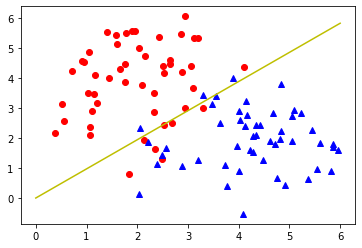

In [48]:
#Visualize dataset along with decision boundary
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')

x = np.linspace(0,6,100)
y = m*x+c
plt.plot(x, y, '-y', label='y=mx+c')
# plt.plot(X[:,0][y==1],X[:,1][y==1],'*',color='yellow')